## Model Development for High-Frequency Trading Data

### Load Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from alpha_vantage.timeseries import TimeSeries

### Load Data and Prepare Features

In [2]:
symbol = 'AAPL'
data = pd.read_csv(f'../data/{symbol}_intraday.csv')

# Convert the date column to datetime
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Normalize the close prices
data['close_normalized'] = (data['4. close'] - data['4. close'].mean()) / data['4. close'].std()

# Create lagged features
data['close_lagged_1'] = data['4. close'].shift(1)
data['close_lagged_2'] = data['4. close'].shift(2)
data['close_lagged_3'] = data['4. close'].shift(3)

# Drop rows with missing values created by lagging
data.dropna(inplace=True)

# Select features and target
features = ['1. open', '2. high', '3. low', '4. close', '5. volume', 'close_lagged_1', 'close_lagged_2', 'close_lagged_3']
target = '4. close'

X = data[features]
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

### Baseline Model: Linear Regression

Linear Regression - Mean Squared Error: 3.3119737238470755e-27
Linear Regression - R^2 Score: 1.0


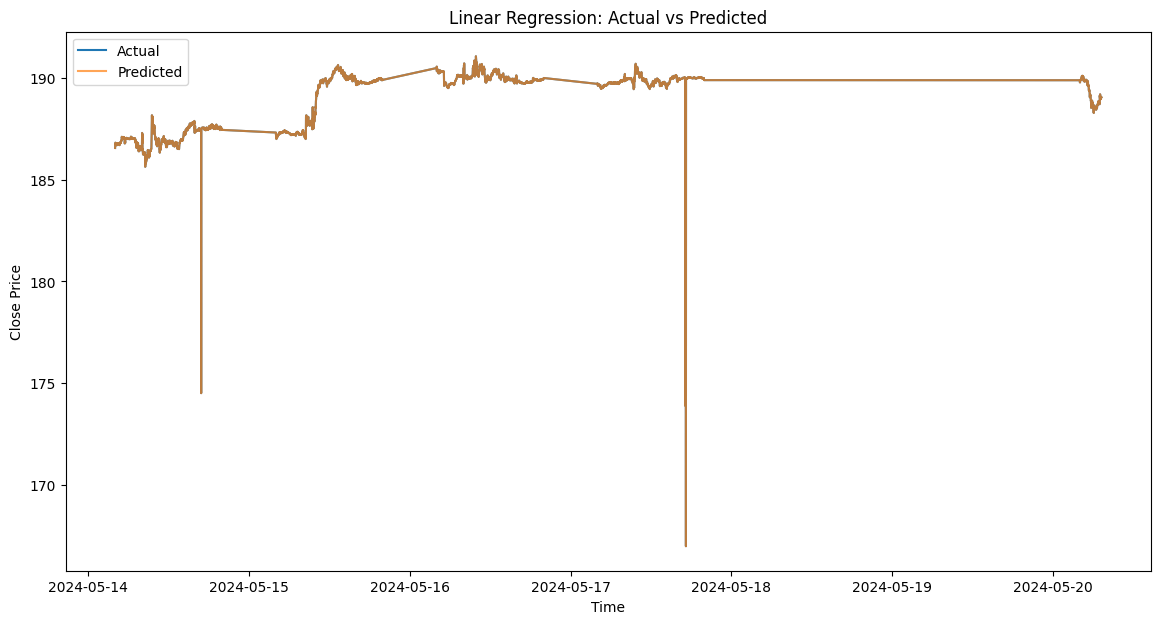

In [3]:
# Initialize and train the model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict on the test set
y_pred = linear_model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression - Mean Squared Error: {mse}")
print(f"Linear Regression - R^2 Score: {r2}")

# Plot actual vs predicted values
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted', alpha=0.7)
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

### Advanced Model: Decision Tree Regressor

Decision Tree - Mean Squared Error: 0.006740821597412462
Decision Tree - R^2 Score: 0.9966449041326653


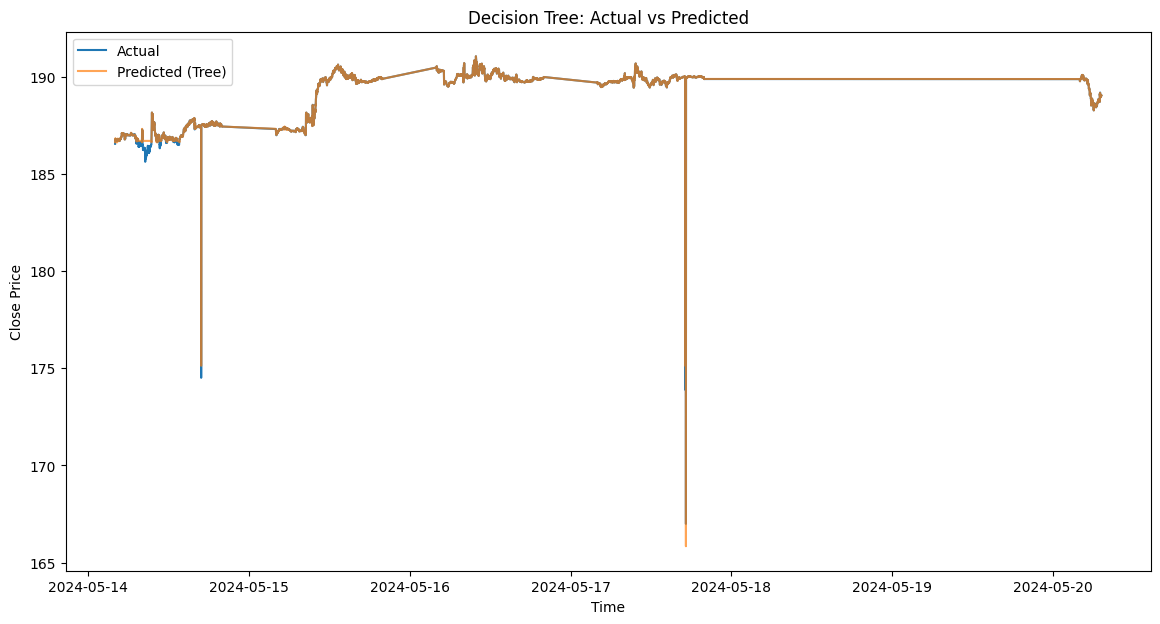

In [4]:
# Initialize and train the model
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)

# Predict on the test set
y_pred_tree = tree_model.predict(X_test)

# Calculate performance metrics
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print(f"Decision Tree - Mean Squared Error: {mse_tree}")
print(f"Decision Tree - R^2 Score: {r2_tree}")

# Plot actual vs predicted values
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred_tree, label='Predicted (Tree)', alpha=0.7)
plt.title('Decision Tree: Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

### Advanced Model: Random Forest Regressor

Random Forest - Mean Squared Error: 0.03522383284282018
Random Forest - R^2 Score: 0.9824681110017807


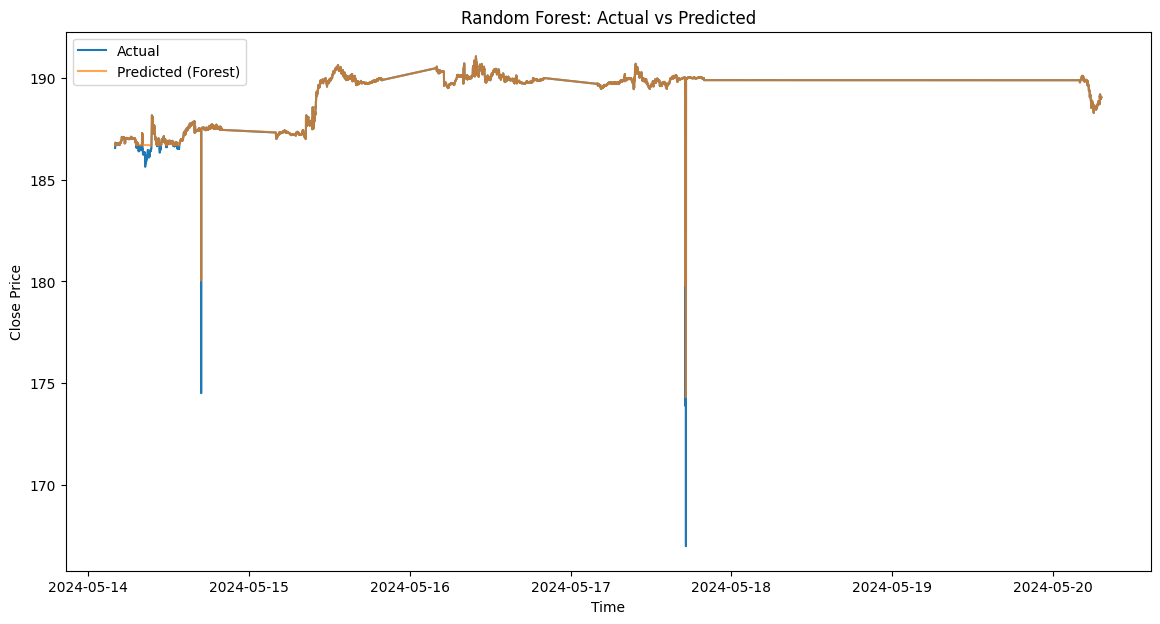

In [5]:
# Initialize and train the model
forest_model = RandomForestRegressor(n_estimators=100)
forest_model.fit(X_train, y_train)

# Predict on the test set
y_pred_forest = forest_model.predict(X_test)

# Calculate performance metrics
mse_forest = mean_squared_error(y_test, y_pred_forest)
r2_forest = r2_score(y_test, y_pred_forest)

print(f"Random Forest - Mean Squared Error: {mse_forest}")
print(f"Random Forest - R^2 Score: {r2_forest}")

# Plot actual vs predicted values
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred_forest, label='Predicted (Forest)', alpha=0.7)
plt.title('Random Forest: Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

### Advanced Model: Gradient Boosting Regressor

Gradient Boosting - Mean Squared Error: 0.00793455710796726
Gradient Boosting - R^2 Score: 0.9960507485063407


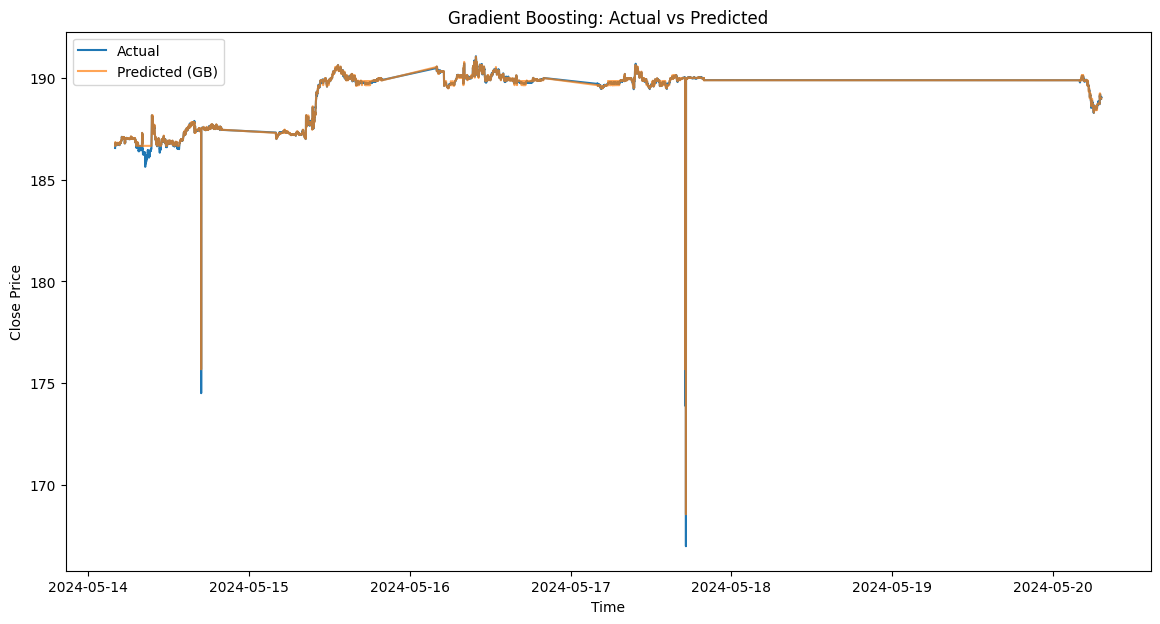

In [6]:
# Initialize and train the model
gb_model = GradientBoostingRegressor(n_estimators=100)
gb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_gb = gb_model.predict(X_test)

# Calculate performance metrics
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting - Mean Squared Error: {mse_gb}")
print(f"Gradient Boosting - R^2 Score: {r2_gb}")

# Plot actual vs predicted values
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred_gb, label='Predicted (GB)', alpha=0.7)
plt.title('Gradient Boosting: Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

## Model Testing with Different Company's Data

### Fetch Data for a Different Company

### Prepare the New Data

In [8]:
symbol_new = 'MSFT'

# Load the data for the new company
data_new = pd.read_csv(f'../data/{symbol_new}_intraday.csv')

# Convert the date column to datetime
data_new['date'] = pd.to_datetime(data_new['date'])
data_new.set_index('date', inplace=True)

# Normalize the close prices
data_new['close_normalized'] = (data_new['4. close'] - data_new['4. close'].mean()) / data_new['4. close'].std()

# Create lagged features
data_new['close_lagged_1'] = data_new['4. close'].shift(1)
data_new['close_lagged_2'] = data_new['4. close'].shift(2)
data_new['close_lagged_3'] = data_new['4. close'].shift(3)

# Drop rows with missing values created by lagging
data_new.dropna(inplace=True)

# Select features and target
features_new = ['1. open', '2. high', '3. low', '4. close', '5. volume', 'close_lagged_1', 'close_lagged_2', 'close_lagged_3']
target_new = '4. close'

X_new = data_new[features_new]
y_new = data_new[target_new]

### Test the Models on the New Data

Linear Regression (MSFT) - Mean Squared Error: 2.070527493957521e-27
Linear Regression (MSFT) - R^2 Score: 1.0


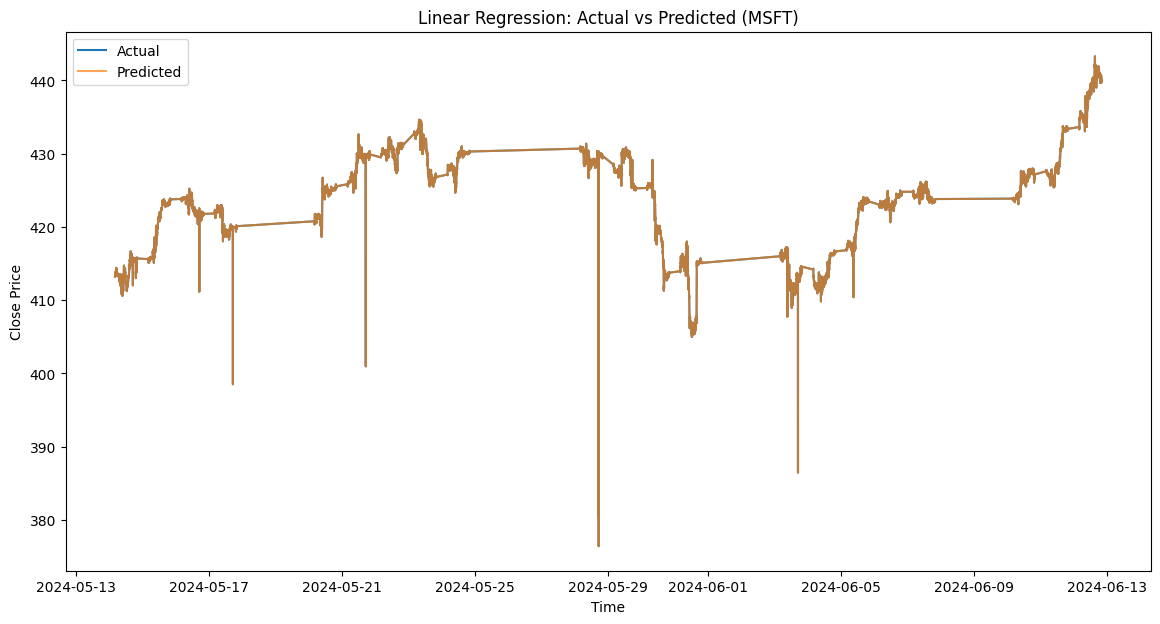

Decision Tree (MSFT) - Mean Squared Error: 41509.76063534114
Decision Tree (MSFT) - R^2 Score: -840.1126586406511


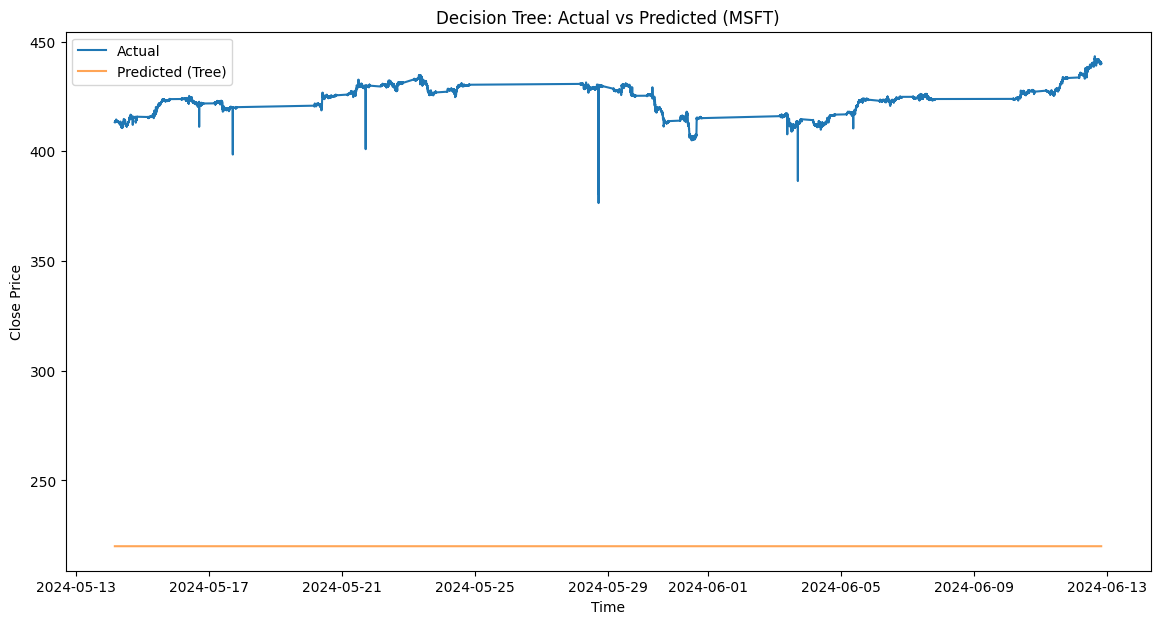

Random Forest (MSFT) - Mean Squared Error: 41514.53130586498
Random Forest (MSFT) - R^2 Score: -840.2093267810208


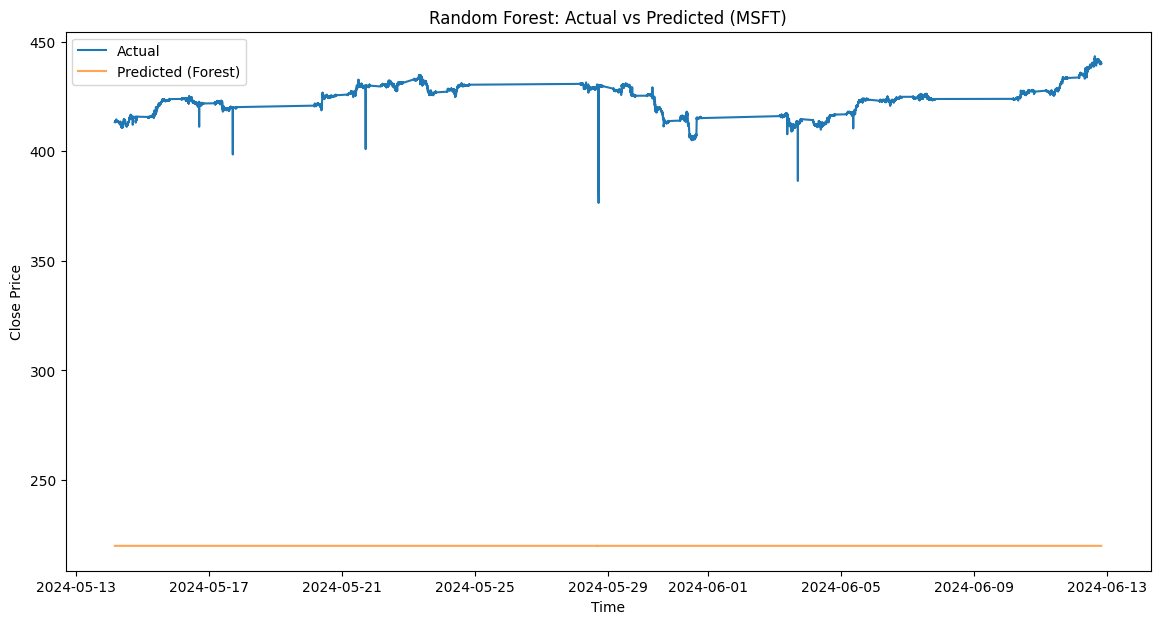

Gradient Boosting (MSFT) - Mean Squared Error: 41521.21977728877
Gradient Boosting (MSFT) - R^2 Score: -840.3448553385309


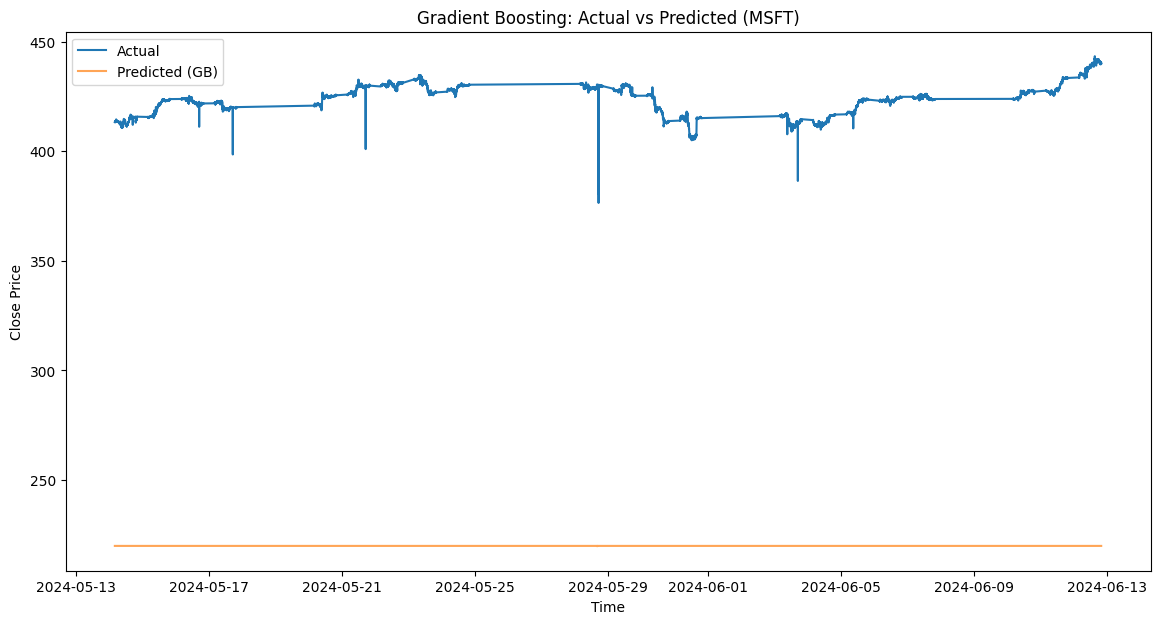

In [9]:
# Predict with the Linear Regression model
y_pred_new_linear = linear_model.predict(X_new)
mse_new_linear = mean_squared_error(y_new, y_pred_new_linear)
r2_new_linear = r2_score(y_new, y_pred_new_linear)

print(f"Linear Regression (MSFT) - Mean Squared Error: {mse_new_linear}")
print(f"Linear Regression (MSFT) - R^2 Score: {r2_new_linear}")

plt.figure(figsize=(14, 7))
plt.plot(y_new.index, y_new, label='Actual')
plt.plot(y_new.index, y_pred_new_linear, label='Predicted', alpha=0.7)
plt.title('Linear Regression: Actual vs Predicted (MSFT)')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Predict with the Decision Tree model
y_pred_new_tree = tree_model.predict(X_new)
mse_new_tree = mean_squared_error(y_new, y_pred_new_tree)
r2_new_tree = r2_score(y_new, y_pred_new_tree)

print(f"Decision Tree (MSFT) - Mean Squared Error: {mse_new_tree}")
print(f"Decision Tree (MSFT) - R^2 Score: {r2_new_tree}")

plt.figure(figsize=(14, 7))
plt.plot(y_new.index, y_new, label='Actual')
plt.plot(y_new.index, y_pred_new_tree, label='Predicted (Tree)', alpha=0.7)
plt.title('Decision Tree: Actual vs Predicted (MSFT)')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Predict with the Random Forest model
y_pred_new_forest = forest_model.predict(X_new)
mse_new_forest = mean_squared_error(y_new, y_pred_new_forest)
r2_new_forest = r2_score(y_new, y_pred_new_forest)

print(f"Random Forest (MSFT) - Mean Squared Error: {mse_new_forest}")
print(f"Random Forest (MSFT) - R^2 Score: {r2_new_forest}")

plt.figure(figsize=(14, 7))
plt.plot(y_new.index, y_new, label='Actual')
plt.plot(y_new.index, y_pred_new_forest, label='Predicted (Forest)', alpha=0.7)
plt.title('Random Forest: Actual vs Predicted (MSFT)')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Predict with the Gradient Boosting model
y_pred_new_gb = gb_model.predict(X_new)
mse_new_gb = mean_squared_error(y_new, y_pred_new_gb)
r2_new_gb = r2_score(y_new, y_pred_new_gb)

print(f"Gradient Boosting (MSFT) - Mean Squared Error: {mse_new_gb}")
print(f"Gradient Boosting (MSFT) - R^2 Score: {r2_new_gb}")

plt.figure(figsize=(14, 7))
plt.plot(y_new.index, y_new, label='Actual')
plt.plot(y_new.index, y_pred_new_gb, label='Predicted (GB)', alpha=0.7)
plt.title('Gradient Boosting: Actual vs Predicted (MSFT)')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()